<p><img alt="UNQ logo" height="45px" src="http://www.unq.edu.ar/images/logo_unqui_footer.png" align="left" hspace="10px" vspace="0px"></p><h1>Redes Neuronales y Lógica Difusa</h1>

**NOTA 1:** Este ejercicio debe hacerse utilizando un entorno de ejecución local, debido a que necesita un tipo de interacción que no puede tenerse en Google Colab. Para ejecutarlo localmente debe seguir [estos pasos](https://research.google.com/colaboratory/local-runtimes.html).

Si ya había instalado todo solamente hay que correr el siguiente comando en la consola de la PC y luego conectarse a un entorno local en Google Colab y copiar la URL que me entregó la consola.

jupyter notebook --NotebookApp.allow_origin='https://colab.research.google.com' --port=8888 --NotebookApp.port_retries=0

**NOTA 2:**
Como el entorno de ejecución es local (su PC), hay que tener instalado Git para poder acceder al repositorio de la materia. Para instalarlo deben seguir [estos pasos](https://git-scm.com/book/en/v2/Getting-Started-Installin).

In [0]:
!git clone https://github.com/redes-unq/Imagenes.git

In [0]:
!python -m pip install neurolab

In [0]:
# Selecciono datos de las imágenes haciendo clic

%matplotlib qt

import matplotlib.pyplot as plt
import neurolab as nl
import numpy as np
from PIL import Image

plt.gray()

N = 4 # Cantidad de muestras de cada tipo

# close open figures
plt.close("all")
#plt.ioff()

im = []
im.append(Image.open("Imagenes/mi1.png"));
im.append(Image.open("Imagenes/mi2.png"));
im.append(Image.open("Imagenes/mi3.png"));

ESCALA = 4

clase = []
clase.append('Materia blanca')
clase.append('Materia gris')
clase.append('Líquido cefaloraquideo')
clase.append('Fondo')

target = [1, 0, 0, 0]

# archivo = scipy.io.loadmat('datos_guia4_ej5_mri.mat')
# archivo.keys()
# mi1 = archivo['mi1']
# mi2 = archivo['mi2']
# mi3 = archivo['mi3']

p = []
t = []
i = 0

fig = plt.figure(figsize=(1 * ESCALA, 1 * ESCALA), dpi=150)
fig.subplots_adjust(hspace=0.1, wspace=0.1)

ax1 = fig.add_subplot(131)
ax1.imshow(im[0])

ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)

ax3 = fig.add_subplot(133)
ax3.imshow(im[2])

ax3.get_xaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)

ax2 = fig.add_subplot(132)
ax2.imshow(im[1])

ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)

titulo = plt.suptitle("Ingrese %d muestras por cada tipo" % N, ha='center', fontsize=9)
subtitulo = plt.title("Faltan %d muestras de %s" % (N, clase[0]), ha='center', fontsize=9)

plt.draw()

for i in range(4):
    for j in range(N):
        pts = plt.ginput(1)[0]
        #print(pts)
        color_mb = im[0].getpixel((pts[0], pts[1]))
        color_mg = im[1].getpixel((pts[0], pts[1]))
        color_cf = im[2].getpixel((pts[0], pts[1]))
        p.append((color_mb, color_mg, color_cf))
        if (i == 0):
            t.append((1, 0, 0, 0))
        elif (i == 1):
            t.append((0, 1, 0, 0))
        elif (i == 2):
            t.append((0, 0, 1, 0))
        elif (i == 3):
            t.append((0, 0, 0, 1))
        if ((j == N - 1) and i < 3):
            subtitulo.set_text("Faltan %d muestras de %s" % (N, clase[i+1]))
        else:
            subtitulo.set_text("Faltan %d muestras de %s" % (N - j - 1, clase[i]))
        plt.draw()

plt.close()

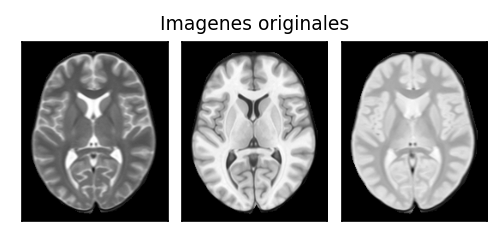

In [0]:
%matplotlib inline

fig = plt.figure(figsize=(1 * ESCALA, 1 * ESCALA), dpi=150)
fig.subplots_adjust(hspace=0.1, wspace=0.1)

ax1 = fig.add_subplot(131)
ax1.imshow(im[0])

ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)

ax3 = fig.add_subplot(133)
ax3.imshow(im[2])

ax3.get_xaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)

ax2 = fig.add_subplot(132)
ax2.imshow(im[1])

ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)

subtitulo = plt.title("Imagenes originales", ha='center', fontsize=9)

plt.draw()

Epoch: 1000; Error: 0.2483258224661681;
Epoch: 2000; Error: 0.1739740504000814;
Epoch: 3000; Error: 0.12407033762894534;
Epoch: 4000; Error: 0.07363522615525366;
The maximum number of train epochs is reached


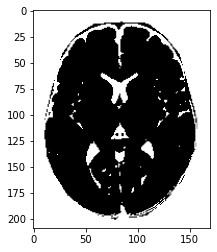

In [0]:
# Entreno la red neuronal con los datos obtenidos previamente

red = nl.net.newff([[-1, 1], [-1, 1], [-1, 1]], [4, 4], [nl.trans.LogSig(), nl.trans.PureLin()])
nl.train.train_gda(red, (np.double(p) - 127) / 128, t, epochs=4000, show=1000, goal=0.001)

salida = np.zeros(np.shape(im[0]))
for x in range(0, np.shape(im[0])[0]):
    for y in range(0, np.shape(im[0])[1]):
        valor = red.sim([(im[0].getpixel((y, x)), im[1].getpixel((y, x)), im[2].getpixel((y, x)))])[0]
        valor = (valor - max(valor) == 0.)
        salida[x, y] = np.dot([1, 120, 200, 40], valor)

plt.imshow(salida)
plt.show()